In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy import stats

In [2]:
# Machine Learning: Regression. Used dataset: "Real estate valuation", https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [3]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx', engine='openpyxl')

In [4]:
df.head()

No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
# Rename long column names for easier visualization
df = df.rename(columns={'X3 distance to the nearest MRT station': 'X3 Dist to MRT',
                       'X4 number of convenience stores': 'X4 num of con stores'})
# The column 'No', describing a unique ID for each row of data, is not needed. Drop it.
df = df.drop(columns=['No'])

<AxesSubplot:>

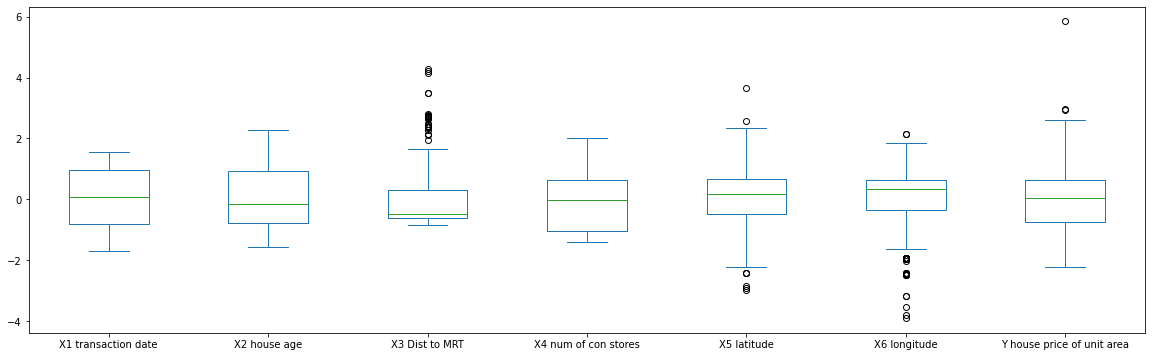

In [7]:
# Normalize and display the data in a box plot
dfNormalized = (df - df.mean()) / df.std()
dfNormalized.plot.box(figsize=(20,6))

<AxesSubplot:>

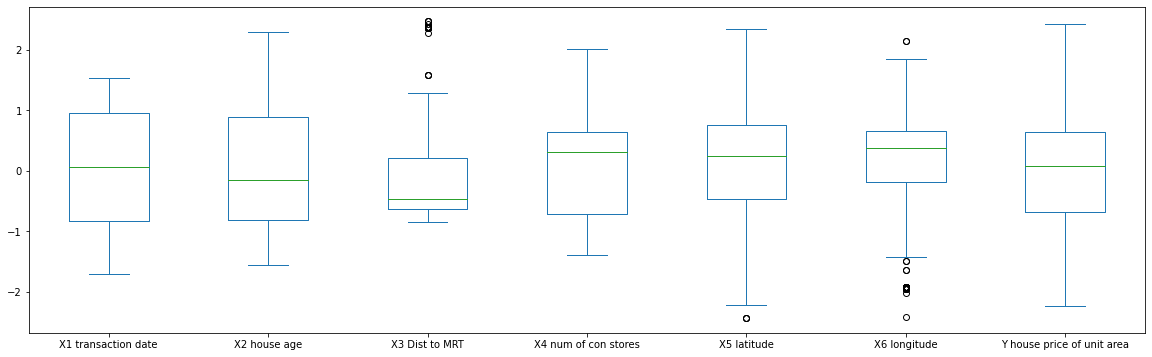

In [8]:
# Clean up outliers by removing data outside a certain z-score range
dfFilter = dfNormalized
dfFilter = dfFilter[(np.abs(stats.zscore(df)) < 2.5).all(axis=1)]
dfFilter.plot.box(figsize=(20,6))

<AxesSubplot:xlabel='X6 longitude', ylabel='Y house price of unit area'>

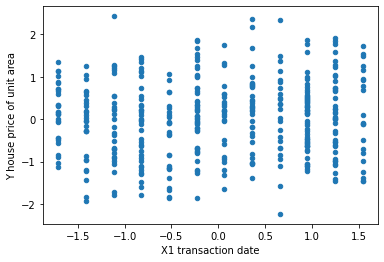

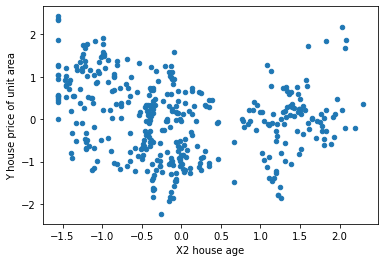

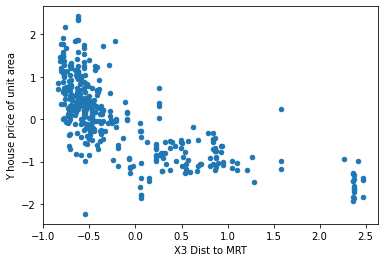

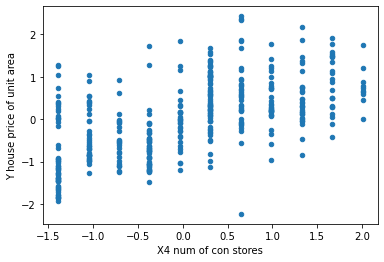

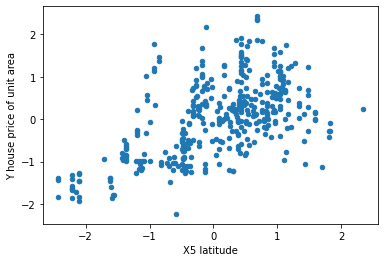

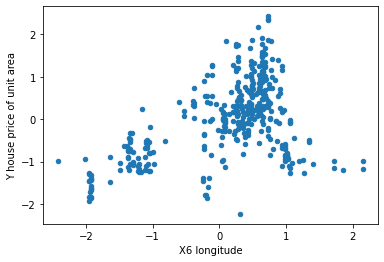

In [9]:
# Comparing X and Y of dataframe, outliers past 2.5 z-score removed, standardized

dfFilter.plot.scatter(x=0, y='Y house price of unit area') # Transaction date
dfFilter.plot.scatter(x=1, y='Y house price of unit area') # House age
dfFilter.plot.scatter(x=2, y='Y house price of unit area') # Dist to MRT
dfFilter.plot.scatter(x=3, y='Y house price of unit area') # Num of con stores
dfFilter.plot.scatter(x=4, y='Y house price of unit area') # Latitude
dfFilter.plot.scatter(x=5, y='Y house price of unit area') # Longitude

In [10]:
# A visible weak correlation between house age and price, 
# negative correlation between dist to MRT and price and 
# positive correlation between num of con stores and price.

# Next, calculate & interpret the correlation coefficient

In [11]:
# Correlation coefficient using Pearson's r
corr = dfFilter.corr(method='pearson').drop(df.columns[[0, 1, 2, 3, 4, 5]])

In [12]:
# The correlation coefficients show that:

# For transaction date, a small price increase over time, hinting at a general upwards trend in housing prices

# For house age, the older, the cheaper. Older houses require a higher amount of maintenance,
# appliances tend to be older, floors and walls show wear. They may not be up to heat isolation standards.

# For distance to MRT station, the further away, the more expensive. Access to public transportation is an
# important factor when deciding on a place to live.

# For number of nearby convenience stores, the price of houses rises along with the number of stores.
# Buyers may be factoring in how long it would take them to get to the nearest grocery store. A long time to commute
# is off-putting.

# For latitude and longitude, a price increase the further the house's coordinates shift to the northeast,
# which hints at the existence of a cheaper, southwestern, and a more expensive, northeastern part of the city.

In [13]:
dfFilter_data = dfFilter.iloc[:, 0:5]
dfFilter_target = dfFilter.iloc[:, 6]

lmr = linear_model.LinearRegression()

regr10_model = lmr.fit(dfFilter_data.sample(frac=0.1, random_state=0), dfFilter_target.sample(frac=0.1, random_state=0))
regr20_model = lmr.fit(dfFilter_data.sample(frac=0.2, random_state=0), dfFilter_target.sample(frac=0.2, random_state=0))
regr40_model = lmr.fit(dfFilter_data.sample(frac=0.4, random_state=0), dfFilter_target.sample(frac=0.4, random_state=0))
regr80_model = lmr.fit(dfFilter_data.sample(frac=0.8, random_state=0), dfFilter_target.sample(frac=0.8, random_state=0))
regr100_model = lmr.fit(dfFilter_data, dfFilter_target)

regr10 = regr10_model.predict(dfFilter_data)
regr20 = regr20_model.predict(dfFilter_data)
regr40 = regr40_model.predict(dfFilter_data)
regr80 = regr80_model.predict(dfFilter_data)
regr100 = regr100_model.predict(dfFilter_data)

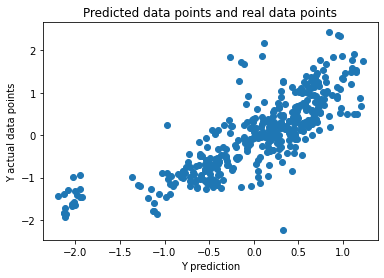

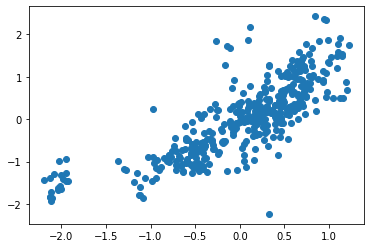

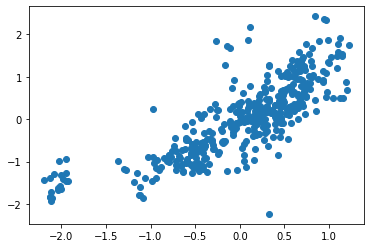

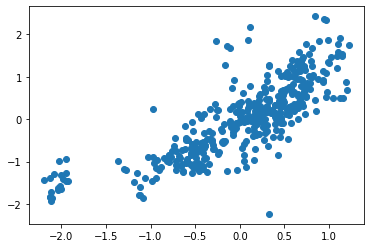

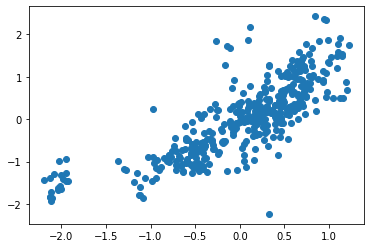

In [14]:
plt.xlabel('Y prediction')
plt.ylabel('Y actual data points')
plt.title('Predicted data points and real data points')

plt.scatter(regr10, dfFilter_target)
plt.show()
plt.scatter(regr20, dfFilter_target)
plt.show()
plt.scatter(regr40, dfFilter_target)
plt.show()
plt.scatter(regr80, dfFilter_target)
plt.show()
plt.scatter(regr100, dfFilter_target)
plt.show()

In [15]:
print("R²:", regr10_model.score(dfFilter_data, dfFilter_target))

R²: 0.64770438286496


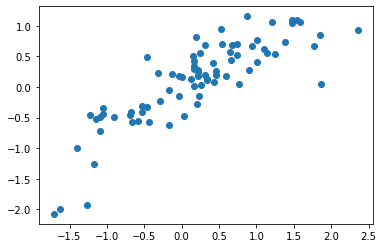

In [16]:
dfFilter_data = dfFilter.iloc[:, 0:5]
dfFilter_target = dfFilter.iloc[:, 6]

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(dfFilter_data, dfFilter_target, test_size=0.2, random_state=0)

lmr = linear_model.LinearRegression()
lmr.fit(X_train, y_train)
y_pred = lmr.predict(X_test)

plt.scatter(y_test, y_pred)
plt.show()

<AxesSubplot:xlabel='X6 longitude', ylabel='Y house price of unit area'>

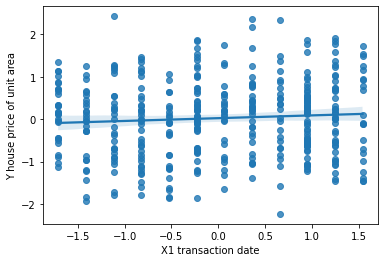

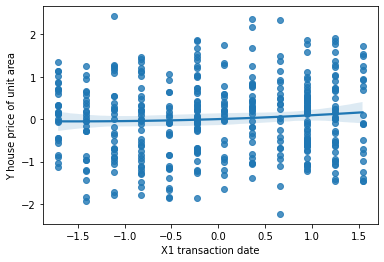

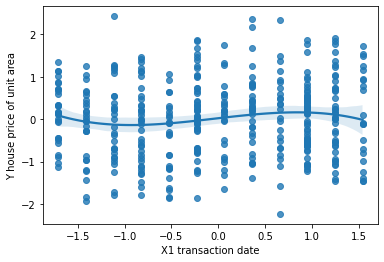

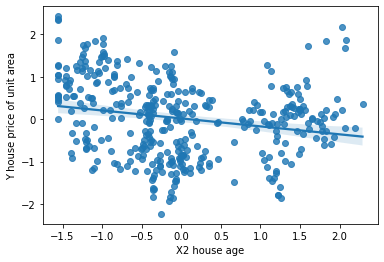

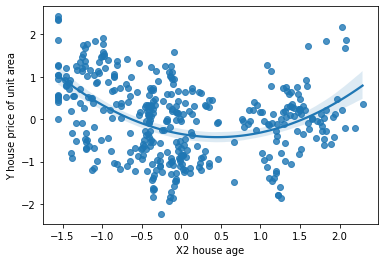

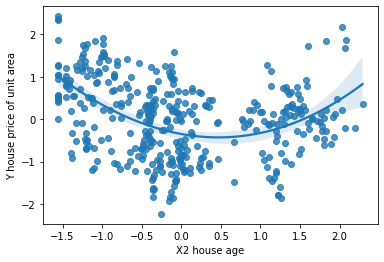

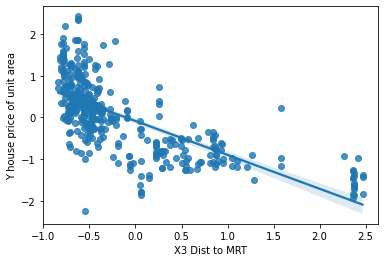

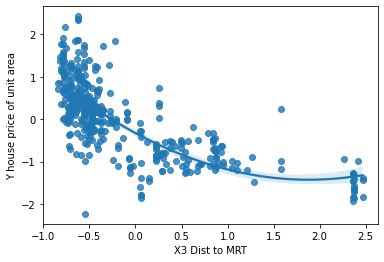

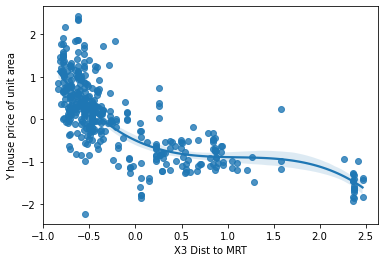

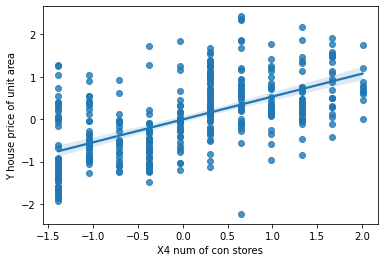

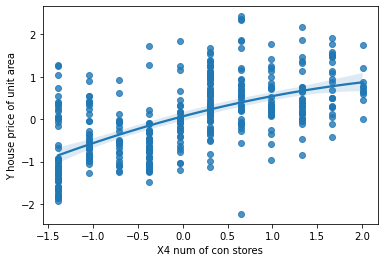

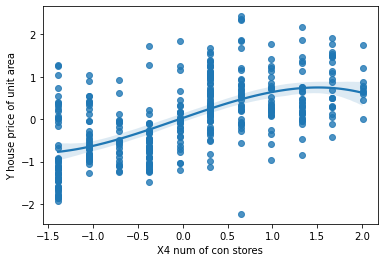

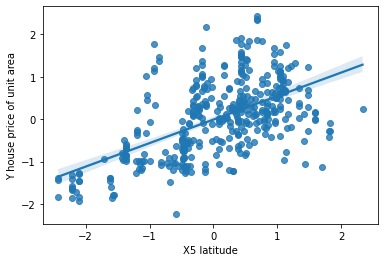

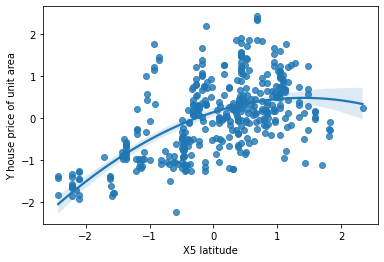

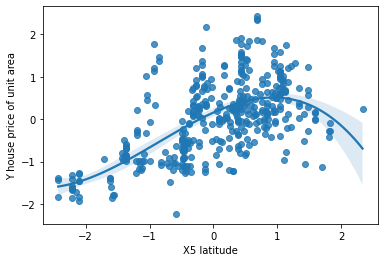

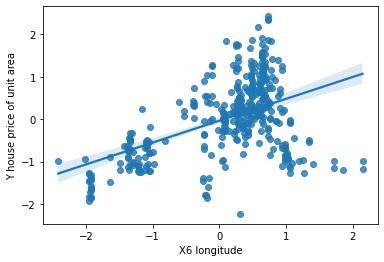

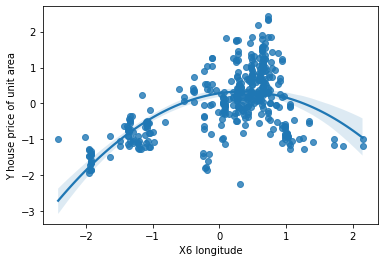

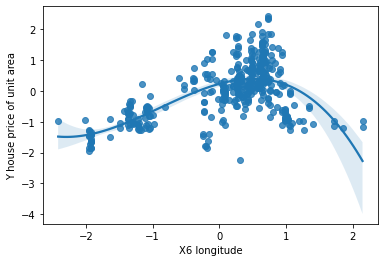

In [17]:
#X1
import seaborn as sns

plt.figure()
sns.regplot(x = "X1 transaction date", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 1)
plt.figure()
sns.regplot(x = "X1 transaction date", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 2)
plt.figure()
sns.regplot(x = "X1 transaction date", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 3)

#X2
plt.figure()
sns.regplot(x = "X2 house age", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 1)
plt.figure()
sns.regplot(x = "X2 house age", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 2)
plt.figure()
sns.regplot(x = "X2 house age", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 3)
#X3
plt.figure()
sns.regplot(x = "X3 Dist to MRT", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 1)
plt.figure()
sns.regplot(x = "X3 Dist to MRT", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 2)
plt.figure()
sns.regplot(x = "X3 Dist to MRT", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 3)

#X4
plt.figure()
sns.regplot(x = "X4 num of con stores", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 1)
plt.figure()
sns.regplot(x = "X4 num of con stores", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 2)
plt.figure()
sns.regplot(x = "X4 num of con stores", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 3)

#X5
plt.figure()
sns.regplot(x = "X5 latitude", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 1)
plt.figure()
sns.regplot(x = "X5 latitude", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 2)
plt.figure()
sns.regplot(x = "X5 latitude", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 3)

#X6
plt.figure()
sns.regplot(x = "X6 longitude", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 1)
plt.figure()
sns.regplot(x = "X6 longitude", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 2)
plt.figure()
sns.regplot(x = "X6 longitude", 
            y = "Y house price of unit area",
            data = dfFilter,
            order = 3)